# Data Exploration

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/raw/Drug_Consumption.csv', sep=',')
df.head(3)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0


In [5]:
df.shape

(1884, 32)

In [7]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isna().sum().sum()

np.int64(0)

In [15]:
df.dtypes

ID             int64
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

## Gender

<BarContainer object of 2 artists>

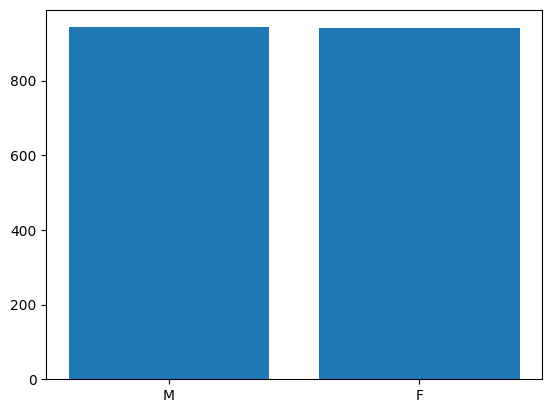

In [40]:
plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values)

# Education

In [46]:
df['Education'].value_counts()

Education
Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: count, dtype: int64

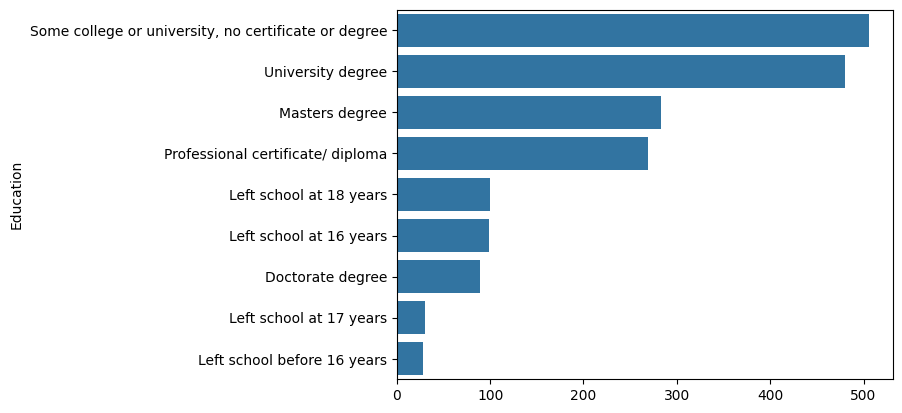

In [56]:
sns.barplot(x=df['Education'].value_counts().values, y=df['Education'].value_counts().index);

## Country

In [57]:
df['Country'].value_counts()

Country
UK                     1043
USA                     557
Other                   118
Canada                   87
Australia                54
Republic of Ireland      20
New Zealand               5
Name: count, dtype: int64

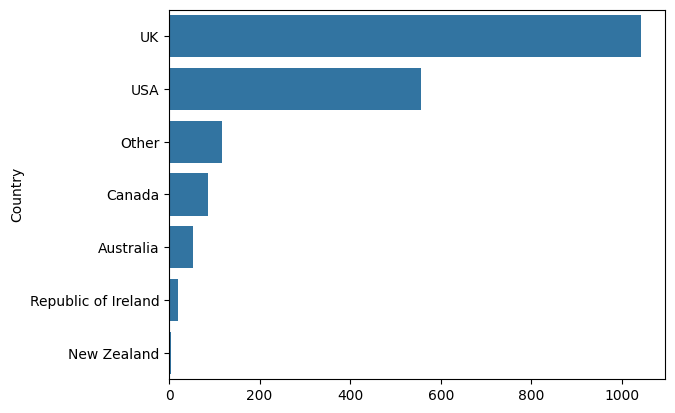

In [58]:
sns.barplot(x=df['Country'].value_counts().values, y=df['Country'].value_counts().index);

## Ethnicity

In [61]:
df['Ethnicity'].value_counts()

Ethnicity
White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Black      20
Mixed-White/Asian      19
Mixed-Black/Asian       3
Name: count, dtype: int64

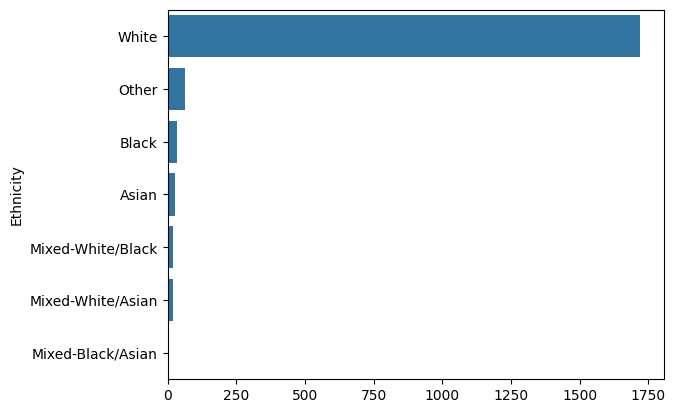

In [60]:
sns.barplot(x=df['Ethnicity'].value_counts().values, y=df['Ethnicity'].value_counts().index);